In [174]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

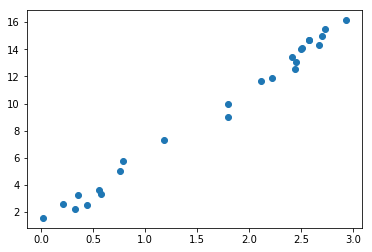

In [175]:
# Create the dataset
x = 3*np.random.rand(25,1) 
y = 5*x + 2*np.random.rand(25,1)

plt.scatter(x,y)

In [176]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [177]:
print("X_train shape :" ,X_train.shape)
print("X_test shape :" ,X_test.shape)
print("y _train shape :" ,y_train.shape)
print("y_test shape :" ,y_test.shape)

X_train shape : (18, 1)
X_test shape : (7, 1)
y _train shape : (18, 1)
y_test shape : (7, 1)


In [178]:
class LinearRegression : 
    def __init__(self) :
        pass
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iter=100):
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []
        
        for i in range(n_iter):
            y_predict = np.dot(X,self.weights) + self.bias
            
            cost = 1 / n_samples * np.sum((y - y_predict)**2)
            costs.append(cost)
            
            
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum(y_predict - y)
            
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db
            
        return self.weights, self.bias, costs
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [179]:
regressor = LinearRegression()

In [180]:
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iter=200)

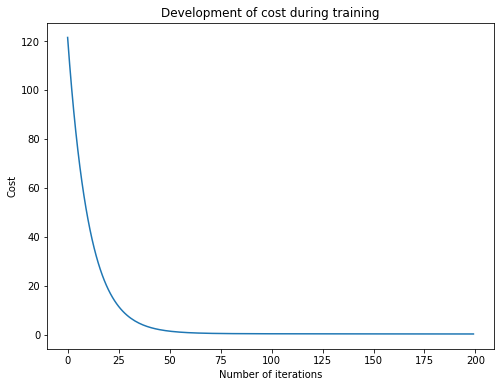

In [181]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(200), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [182]:
# Evaluate the model
n_samples = X_train.shape[0]
n_samples_test = X_test.shape[0]

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

In [183]:
error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 0.3443
Error on test set: 1.0


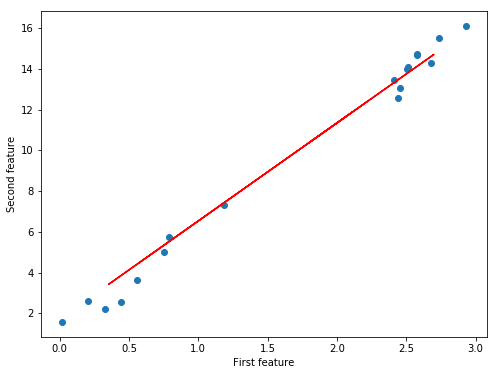

In [188]:
# Plot the test predictions
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_p_test, 'r')
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()